# Importer les librairies

## les librairies nécessaires pour Preprocessing

In [2]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## les librairies nécessaires pour visualisation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns


## les librairies nécessaires pour entrainement

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Charger les donnees

In [7]:
data=pd.read_csv("/content/PRDECT_ID_Dataset_with_English.csv")

In [8]:
data.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion,Customer Review English
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy,Thank God it works well. Safe packaging. Fast ...
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy,"good items and fast response, competitive pric..."
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy,"good item, works well, friendly seller, fast d..."
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy,"good as expected, the seller is also friendly...."
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy,"Good item, safe packaging, works well"


In [9]:
data.shape

(5400, 12)

# Nettoyage et Pre-traitement

## Nettoyage des donnees

In [10]:
# Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {data.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {data.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {data.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(data.isna().sum())}')

Number of records (rows) in the dataset are: 5400
Number of features (columns) in the dataset are: 12
Number of duplicate entries in the dataset are: 7
Number missing values in the dataset are: 0


In [11]:
data.dropna(subset=['Customer Review'], inplace=True)

In [12]:
data.drop_duplicates(subset=['Customer Review'], keep='first', inplace=True)

In [13]:
# Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {data.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {data.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {data.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(data.isna().sum())}')

Number of records (rows) in the dataset are: 5305
Number of features (columns) in the dataset are: 12
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 0


## Pre-traitement

In [14]:
def normalize_text(text):
    contractions = {
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }

    for contraction, full_form in contractions.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, text)

    return text

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

In [16]:
def preprocess_text(text):
    # Étape de normalisation
    sentence = normalize_text(text)

    # Suppression de la ponctuation et mise en minuscule
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

    # Suppression des chiffres
    sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

    # Tokenisation
    tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

    # Suppression des mots vides
    words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

    # Lemmatisation
    words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

    # Reconstruction de la phrase nettoyée
    sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

    return sentence_clean


In [17]:
data['clean_review_text'] = data['Customer Review English'].apply(preprocess_text)

In [18]:
data['clean_review_text']

,clean_review_text
0,thank god work well safe fast friendly respons...
1,good item fast response competitive price
2,good item work well friendly seller fast delivery
3,good seller also friendly thanks seller
4,good item safe work well
...,...
5395,competitive price good ordered added extra car...
5396,bought child wife going holiday looking shop p...
5397,good good condition good intact without defect...
5398,tiny work well cheap affordable fit need


# Visualisation des donnees

### Longuer des review

In [27]:
data['review_length'] = data['Customer Review English'].apply(lambda x: len(nltk.word_tokenize(x)))


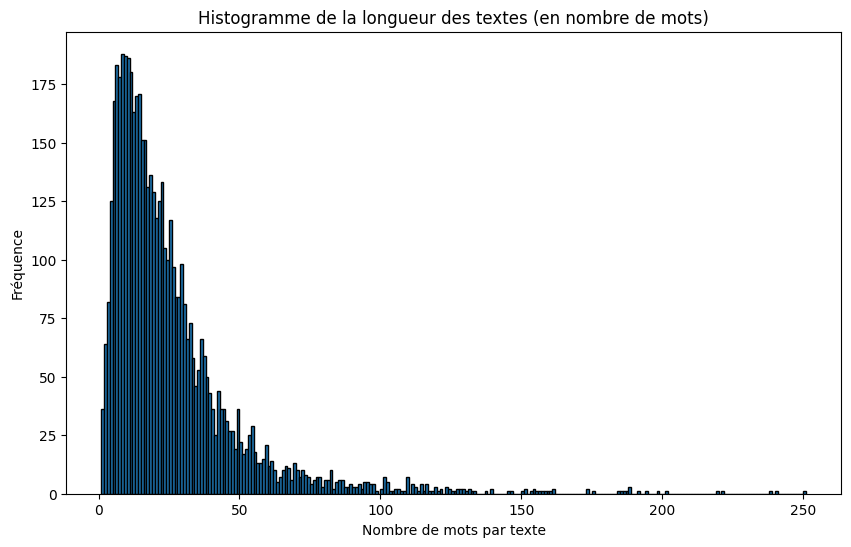

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data['review_length'], bins=range(1, max(data['review_length']) + 2), edgecolor='black')
plt.xlabel("Nombre de mots par texte")
plt.ylabel("Fréquence")
plt.title("Histogramme de la longueur des textes (en nombre de mots)")
plt.show()

### Sentiment Distribution

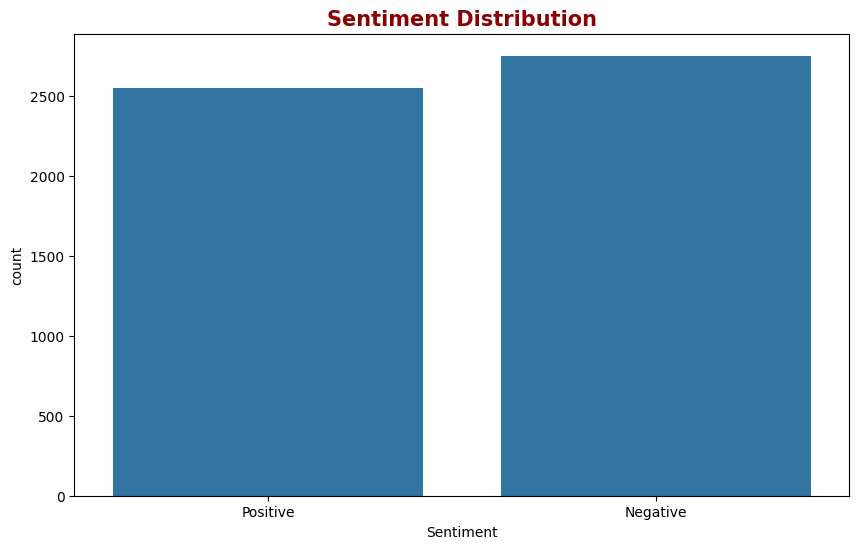

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Sentiment Distribution.png')
plt.show()

### Emotion Distribution

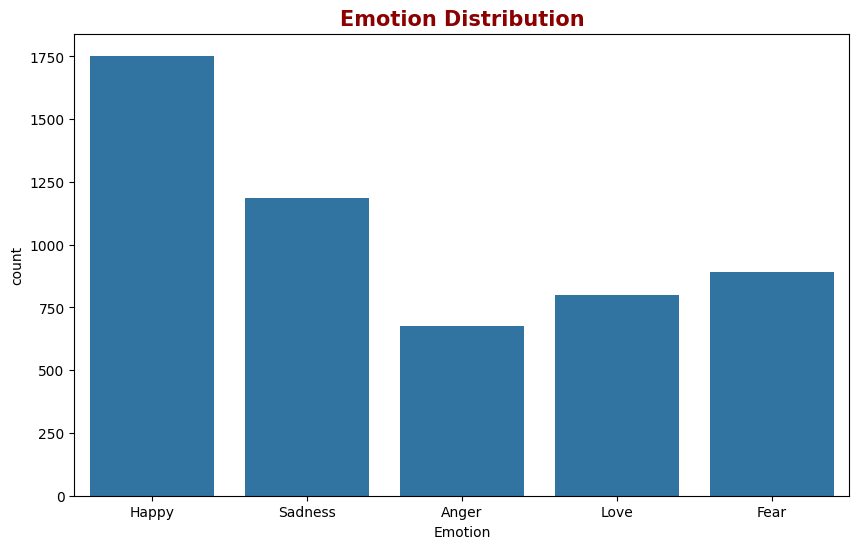

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=data)
plt.title('Emotion Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution.png')
plt.show()

### Les mots le plus frequents

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


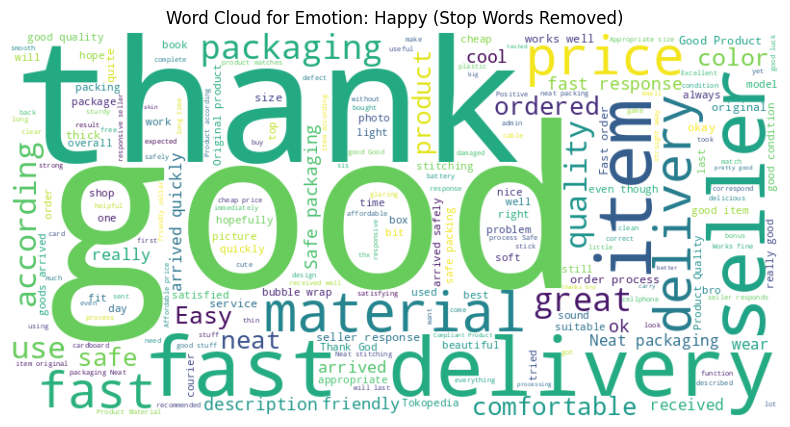

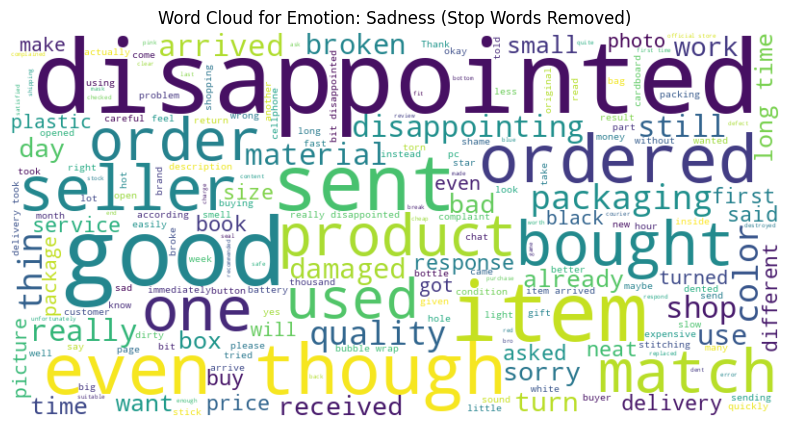

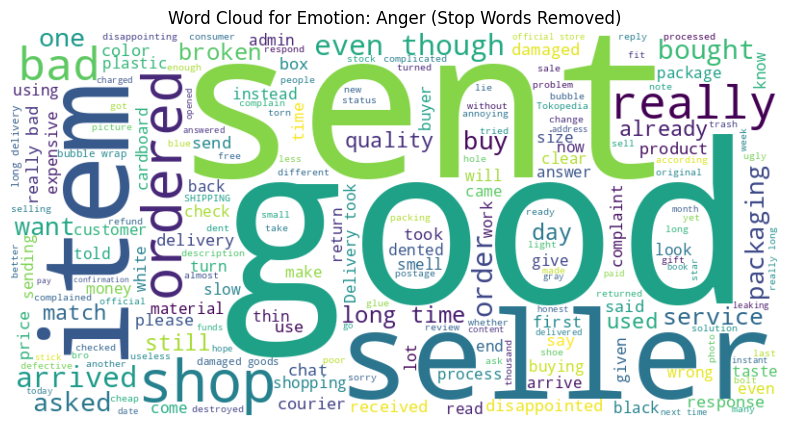

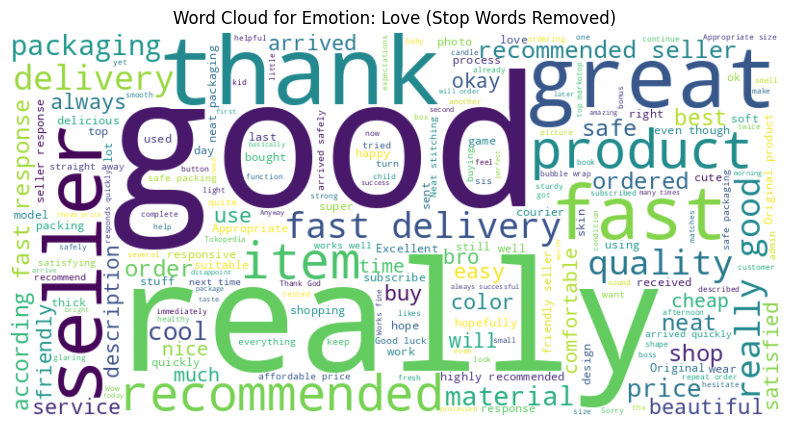

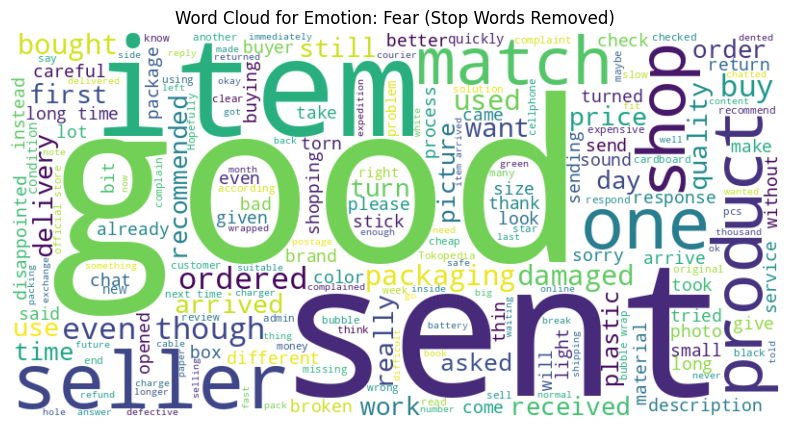

         Word  Frequency
0      really        644
1       goods        639
2        good        576
3        item        537
4      seller        504
5        fast        476
6     arrived        394
7        sent        364
8        even        360
9    delivery        357
10  packaging        356
11    product        354
12     though        339
13    quality        335
14   material        308
15      order        298
16       time        273
17      good,        269
18      Thank        265
19     bought        251


In [32]:
# Define stop words
stopwords = set(STOPWORDS)

# Generate word clouds for each emotion with stop words removed
emotion_clouds_no_stopwords = {}
emotions = data['Emotion'].unique()

for emotion in emotions:
    reviews = data.loc[data['Emotion'] == emotion, 'Customer Review English'].dropna().tolist()
    all_text = ' '.join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_text)
    emotion_clouds_no_stopwords[emotion] = wordcloud

# Display word clouds without stop words
for emotion, cloud in emotion_clouds_no_stopwords.items():
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Emotion: {emotion} (Stop Words Removed)')
    plt.axis('off')
    plt.show()

# Count the most frequent words in 'Customer Review English' without stop words
all_reviews_text = ' '.join(data['Customer Review English'].dropna().tolist())
filtered_words = [word for word in all_reviews_text.split() if word.lower() not in stopwords]
filtered_word_counts = Counter(filtered_words)

# Display the most frequent words
filtered_common_words = pd.DataFrame(filtered_word_counts.most_common(20), columns=['Word', 'Frequency'])
print(filtered_common_words)

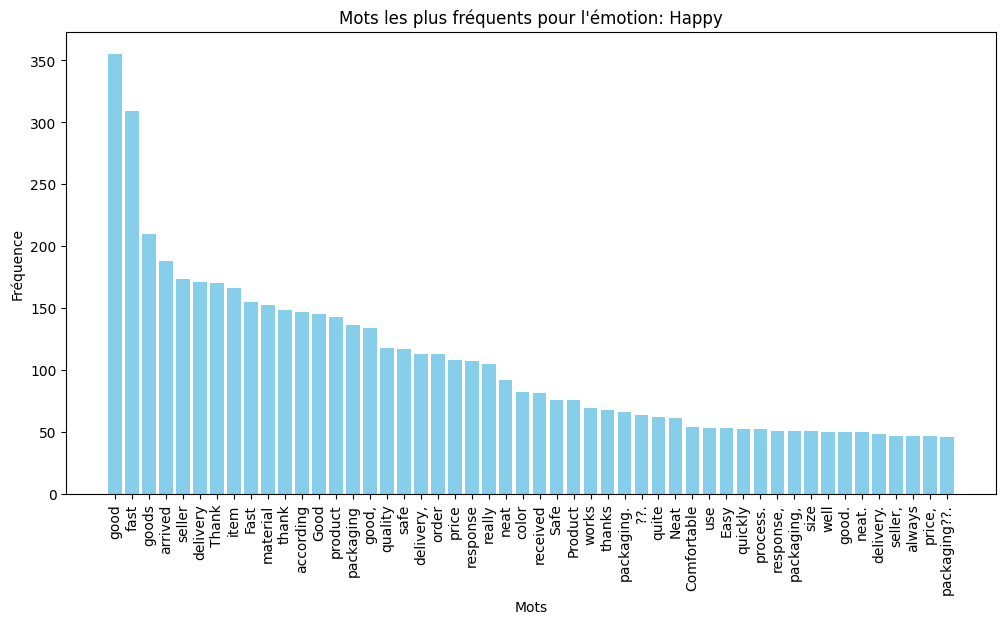

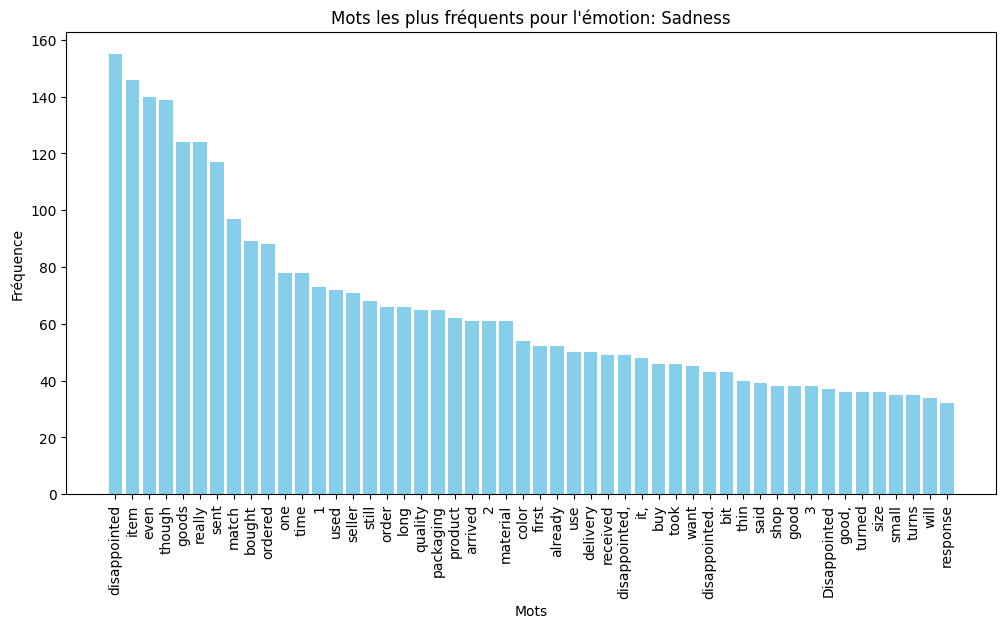

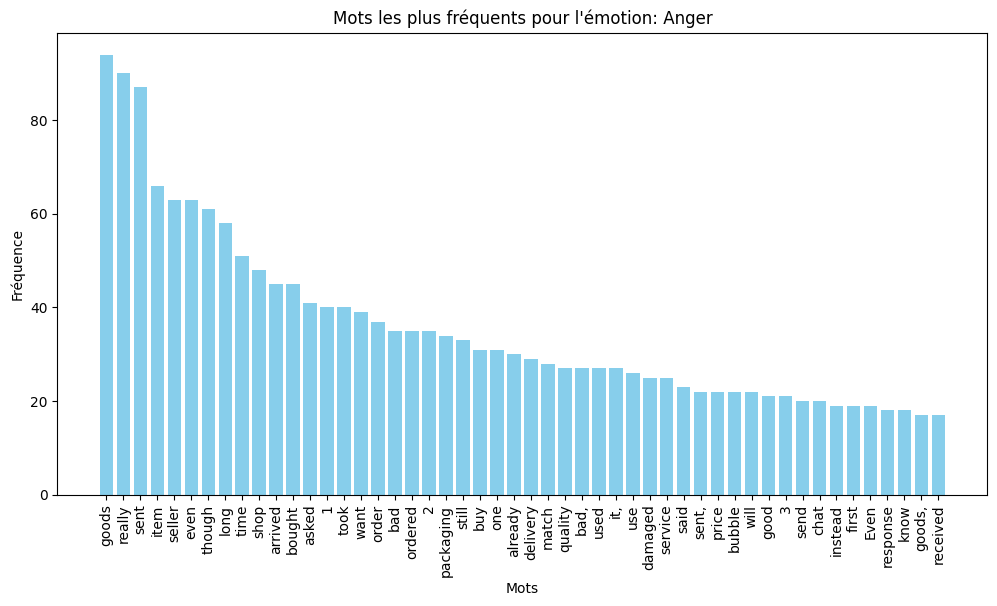

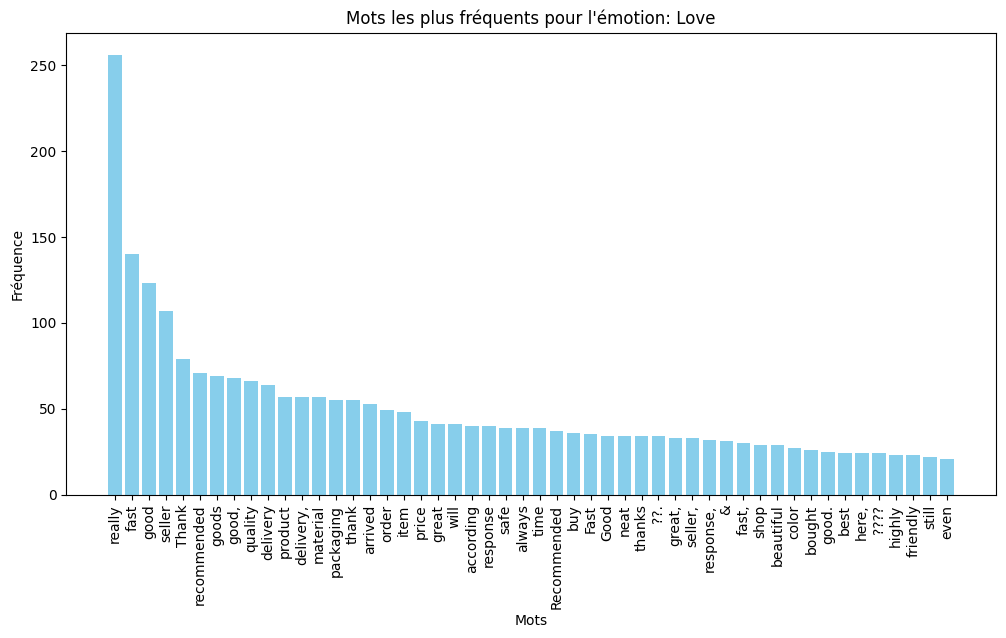

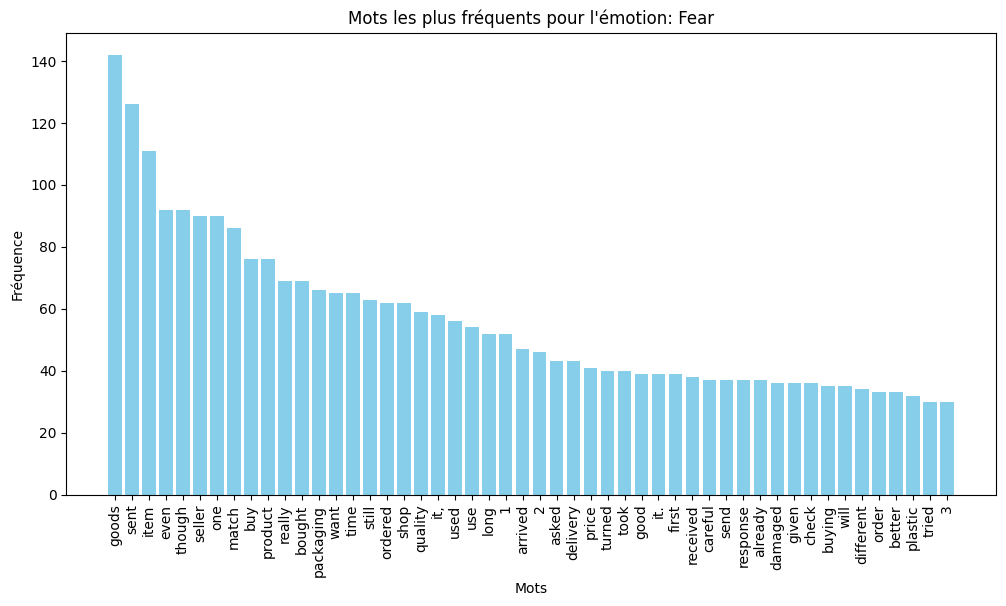

In [33]:
# Generate bar charts for the most common words for each emotion
for emotion in emotions:
    reviews = data.loc[data['Emotion'] == emotion, 'Customer Review English'].dropna().tolist()
    all_words = [word for review in reviews for word in review.split() if word.lower() not in stopwords]
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(50)

    if most_common_words:  # Ensure there are words to display
        words, frequencies = zip(*most_common_words)
        plt.figure(figsize=(12, 6))
        plt.bar(words, frequencies, color='skyblue')
        plt.xlabel("Mots")
        plt.ylabel("Fréquence")
        plt.title(f"Mots les plus fréquents pour l'émotion: {emotion}")
        plt.xticks(rotation=90)
        plt.show()

###  Fréquence des N-grammes

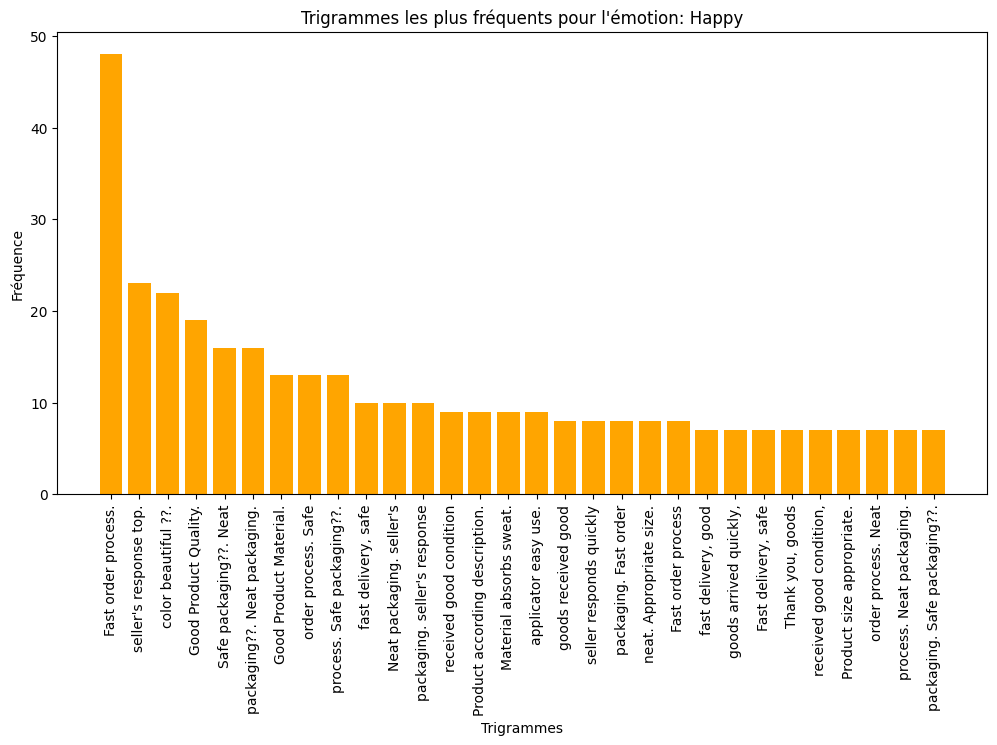

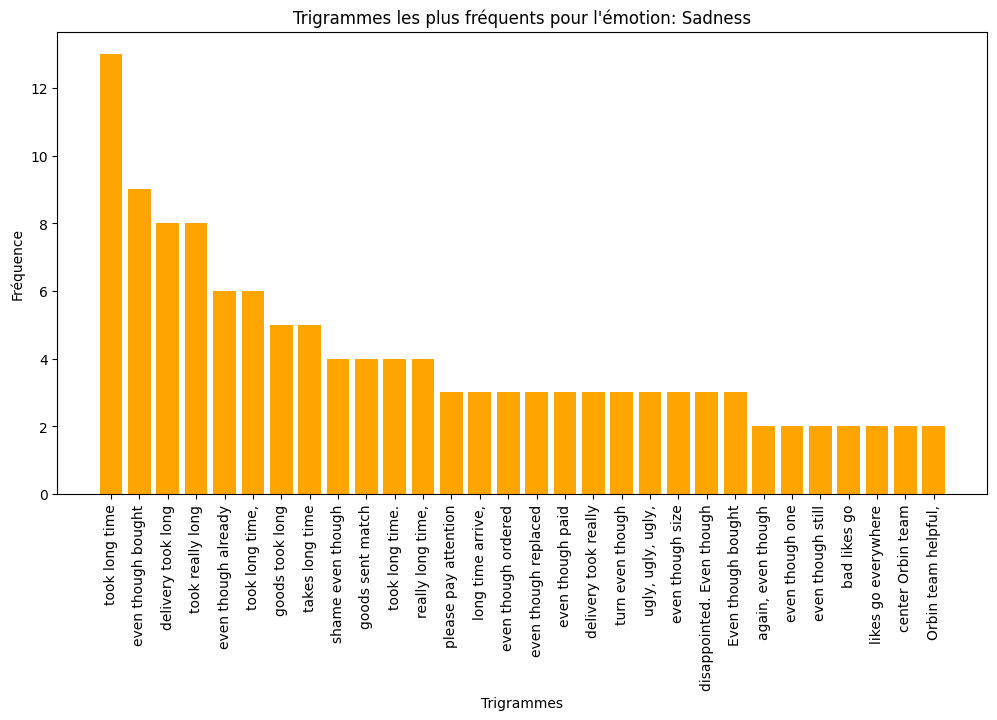

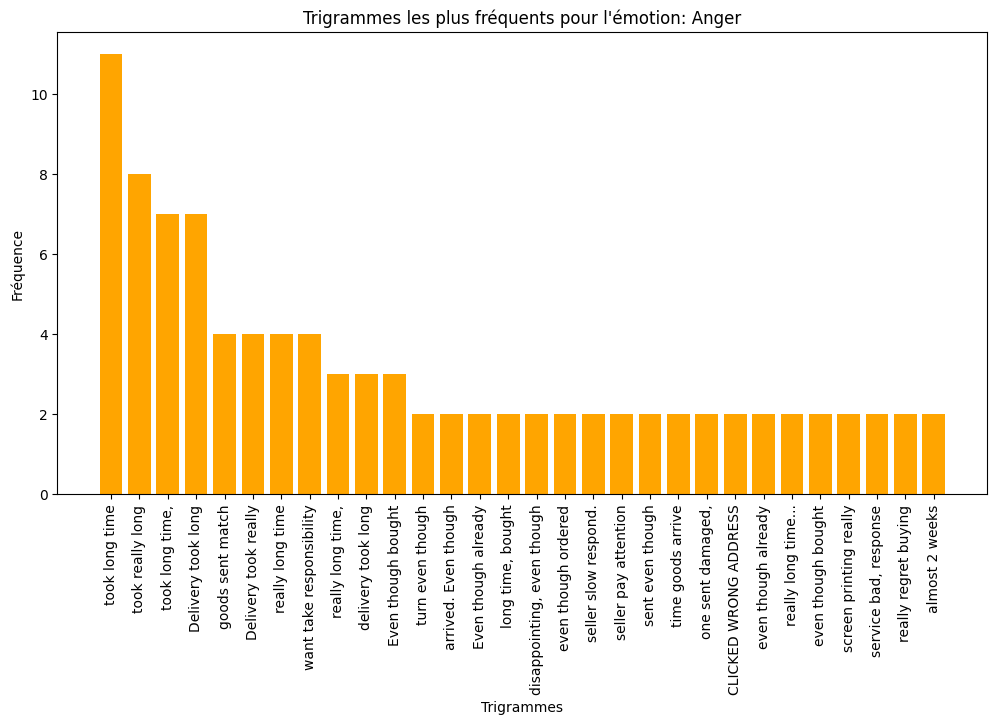

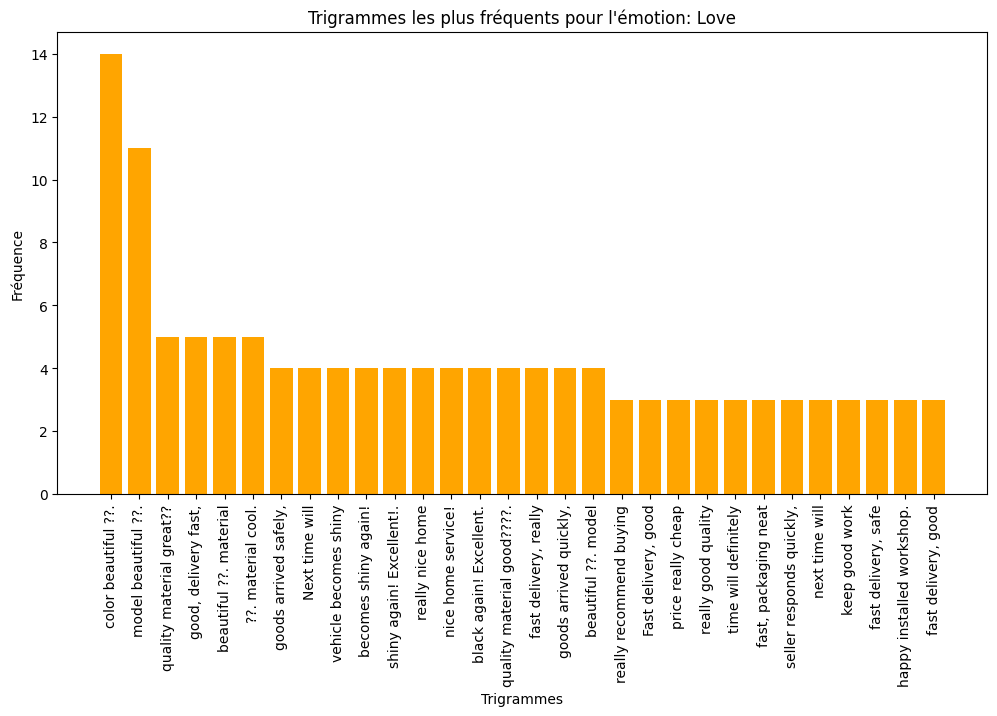

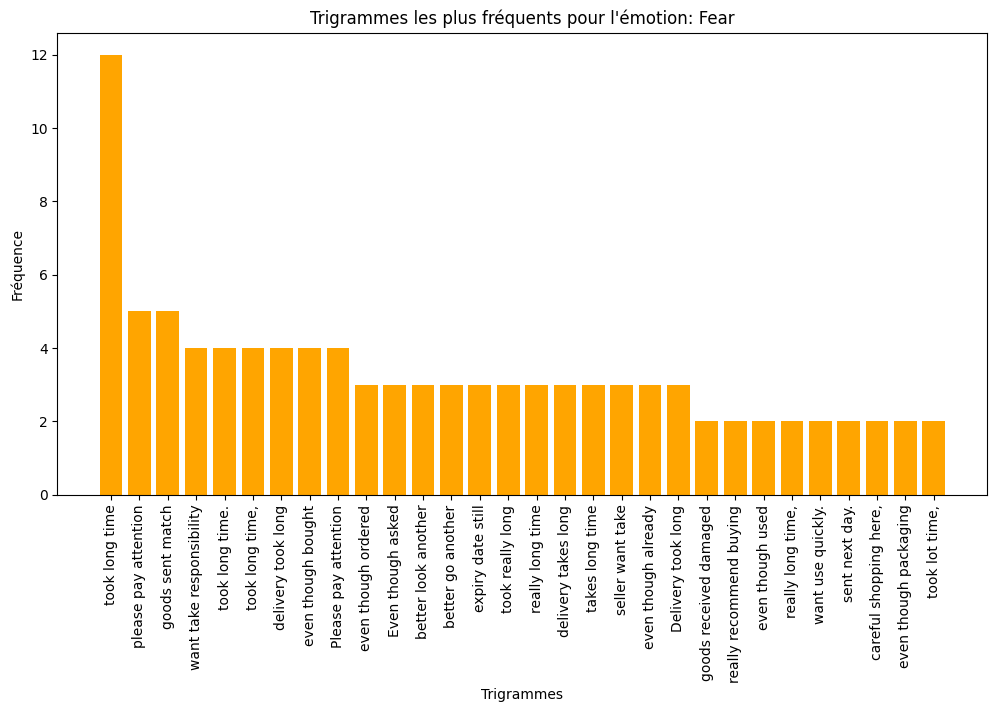

In [34]:
from nltk.util import ngrams
from collections import Counter

for emotion in emotions:
    reviews = data.loc[data['Emotion'] == emotion, 'Customer Review English'].dropna().tolist()
    all_words = [word for review in reviews for word in review.split() if word.lower() not in stopwords]
    trigrams = ngrams(all_words, 3)  # Generate trigrams
    trigram_counts = Counter(trigrams)

    # Extract the 30 most common trigrams
    most_common_trigrams = trigram_counts.most_common(30)

    if most_common_trigrams:  # Ensure there are trigrams to display
        trigrams, frequencies = zip(*most_common_trigrams)
        trigram_labels = [' '.join(trigram) for trigram in trigrams]

        plt.figure(figsize=(12, 6))
        plt.bar(trigram_labels, frequencies, color='orange')
        plt.xlabel("Trigrammes")
        plt.ylabel("Fréquence")
        plt.title(f"Trigrammes les plus fréquents pour l'émotion: {emotion}")
        plt.xticks(rotation=90)
        plt.show()


# Vectorisation

In [35]:
label_encoder = LabelEncoder()
y =label_encoder.fit_transform(data['Sentiment'])

In [36]:
from tkinter.constants import X
tfidf_vectorizer = TfidfVectorizer( stop_words='english')
tfidf_vectorizer = tfidf_vectorizer.fit(data['clean_review_text'])
X = tfidf_vectorizer.transform(data['clean_review_text'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entainement de modele (Negative/positive)

---



## SVM Classifier

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Use GridSearchCV for tuning
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END ....................C=0.1, gamma=0.1, 

In [55]:
# Evaluate on the test set
y_pred_dt = grid.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_dt))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.90      1114
           1       0.92      0.85      0.89      1008

    accuracy                           0.90      2122
   macro avg       0.90      0.89      0.90      2122
weighted avg       0.90      0.90      0.90      2122



## Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(dt_model, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [50]:
# Evaluate on the test set
y_pred_dt = grid_search.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1114
           1       0.79      0.75      0.77      1008

    accuracy                           0.79      2122
   macro avg       0.79      0.78      0.78      2122
weighted avg       0.79      0.79      0.79      2122



## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8972695319056504


In [52]:
# Evaluate on the test set
y_pred_rf = grid_search.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1114
           1       0.89      0.89      0.89      1008

    accuracy                           0.90      2122
   macro avg       0.90      0.90      0.90      2122
weighted avg       0.90      0.90      0.90      2122



# Entrainement de modele (Les emotions)

## Split data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, data["Emotion"], test_size=0.4, random_state=42)

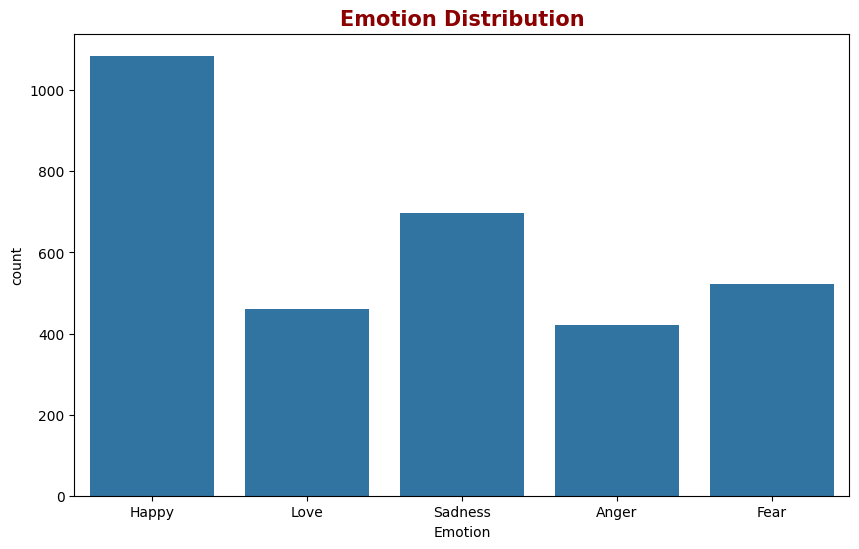

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=X_train)
plt.title('Emotion Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution.png')
plt.show()

# upsampling et undersimpling

In [23]:
from sklearn.utils import resample

# Define the column representing emotions
emotion_col = 'Emotion'  # Replace with the actual column name in your DataFrame

# Define the target size for balancing
target_size = 600

# Separate the DataFrame by emotion
emotion_groups = [X_train[X_train[emotion_col] == emotion] for emotion in X_train[emotion_col].unique()]

# Apply upsampling or undersampling to each group
balanced_groups = []
for group in emotion_groups:
    if len(group) > target_size:
        balanced_group = resample(group, replace=False, n_samples=target_size, random_state=42)  # Undersampling
    else:
        balanced_group = resample(group, replace=True, n_samples=target_size, random_state=42)  # Upsampling
    balanced_groups.append(balanced_group)

# Concatenate all balanced groups
balanced_df = pd.concat(balanced_groups)

# Shuffle the final DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced DataFrame information
print(balanced_df[emotion_col].value_counts())


Emotion
Anger      600
Love       600
Happy      600
Fear       600
Sadness    600
Name: count, dtype: int64


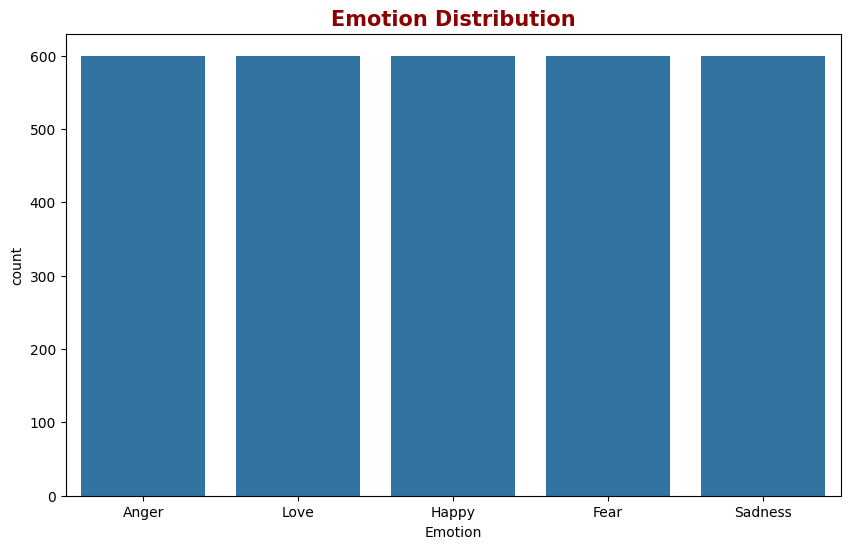

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=balanced_df)
plt.title('Emotion Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution.png')
plt.show()

## Vectorisation

In [37]:
X_=tfidf_vectorizer.transform(balanced_df['clean_review_text'])
y_=label_encoder.fit_transform(balanced_df['Emotion'])

In [42]:
X_test_=tfidf_vectorizer.transform(X_test['clean_review_text'])
y_test_=label_encoder.fit_transform(y_test)

## SVM Classifier

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Use GridSearchCV for tuning
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_, y_)

# Print the best parameters and the best score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END ....................C=0.1, gamma=0.1, 

In [43]:
# Evaluate on the test set
y_pred_dt = grid.predict(X_test_)
print("SVM Classification Report:")
print(classification_report(y_test_, y_pred_dt))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       255
           1       0.42      0.32      0.36       371
           2       0.71      0.70      0.71       668
           3       0.60      0.44      0.51       340
           4       0.46      0.69      0.55       488

    accuracy                           0.54      2122
   macro avg       0.52      0.49      0.50      2122
weighted avg       0.55      0.54      0.54      2122



## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf_model, param_grid, refit=True, verbose=2, cv=5)
grid_search_rf.fit(X_, y_)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.6543333333333333


In [47]:
# Evaluate on the test set
y_pred_ = grid_search_rf.predict(X_test_)
print("Random Forest Classification Report:")
print(classification_report(y_test_, y_pred_))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.31      0.34       255
           1       0.42      0.26      0.32       371
           2       0.67      0.69      0.68       668
           3       0.47      0.50      0.49       340
           4       0.50      0.64      0.56       488

    accuracy                           0.53      2122
   macro avg       0.49      0.48      0.48      2122
weighted avg       0.52      0.53      0.52      2122



## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(dt_model, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_, y_)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [45]:
# Evaluate on the test set
y_pred_dt = grid_search.predict(X_test_)
print("Decision Tree Classification Report:")
print(classification_report(y_test_, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.28      0.25       255
           1       0.28      0.24      0.26       371
           2       0.58      0.53      0.55       668
           3       0.34      0.41      0.37       340
           4       0.45      0.44      0.44       488

    accuracy                           0.41      2122
   macro avg       0.38      0.38      0.38      2122
weighted avg       0.42      0.41      0.41      2122



In [1]:
!pip freeze > requirements.txt